Name     : SILVA G.B.N.M. <br>
Index No : 190592X

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Question 1

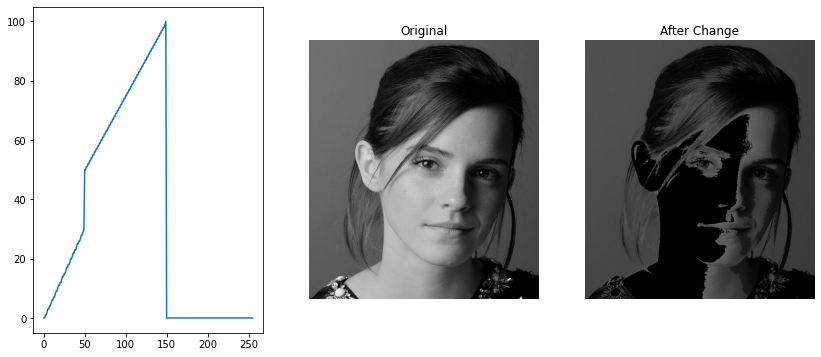

In [137]:
emma = cv.imread(r'images/emma_gray.jpg')
assert emma is not None

t1 = np.linspace(0,30,50)
t2 = np.linspace(50,100,100)
t3 = np.linspace(0,0,106)

table = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
# fig,ax = plt.subplots(figsize=(6,6))
# ax.plot(table)

assert len(table)==256

output_emma = cv.LUT(emma,table)

fig,ax = plt.subplots(1,3,figsize=(14,6))
ax[0].plot(table)
ax[1].imshow(cv.cvtColor(emma,cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].title.set_text('Original')
ax[2].imshow(cv.cvtColor(output_emma,cv.COLOR_BGR2RGB))
ax[2].axis('off')
ax[2].title.set_text('After Change')
plt.savefig(r"../../Assignment 1/11.jpg")

Question 2

256 256


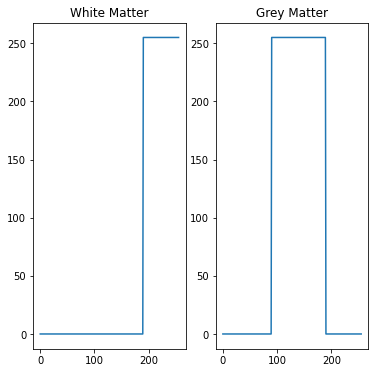

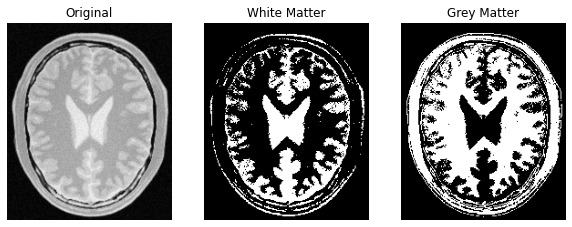

In [128]:
brain_image = cv.imread(r'images/brain_proton_density_slice.png')
assert brain_image is not None

t1_w = [0]*190
t2_w = [255]*66

t1_g = [0]*90
t2_g = [255]*100
t3_g = [0]*66

table_w = np.concatenate((t1_w,t2_w),axis=0).astype(np.uint8)
table_g = np.concatenate((t1_g,t2_g,t3_g),axis=0).astype(np.uint8)

fig,ax = plt.subplots(1,2,figsize=(6,6))
ax[0].plot(table_w)
ax[0].title.set_text('White Matter')
ax[1].plot(table_g)
ax[1].title.set_text('Grey Matter')

plt.savefig(r"../../Assignment 1/21.jpg")

print(len(table_g),len(table_w))
assert len(table_w)==256
assert len(table_g)==256

white_brain = cv.LUT(brain_image,table_w)
grey_brain = cv.LUT(brain_image,table_g)

fig,ax = plt.subplots(1,3,figsize=(10,6))
ax[0].imshow(cv.cvtColor(brain_image,cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].title.set_text('Original')
ax[1].imshow(cv.cvtColor(white_brain,cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].title.set_text('White Matter')
ax[2].imshow(cv.cvtColor(grey_brain,cv.COLOR_BGR2RGB))
ax[2].axis('off')
ax[2].title.set_text('Grey Matter')
plt.savefig(r"../../Assignment 1/22.jpg")

Question three

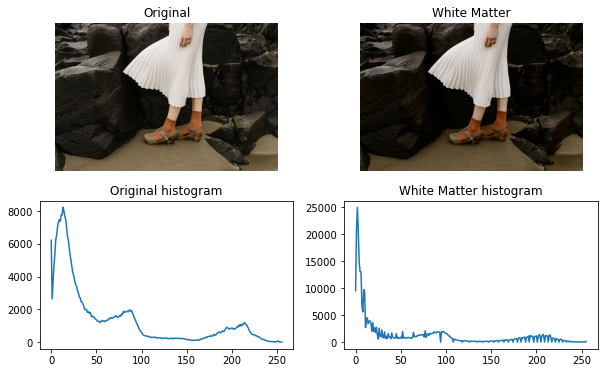

In [142]:
grey_image = cv.imread(r'images/highlights_and_shadows.jpg')
assert grey_image is not None

gamma = 1.4

lab_image = cv.cvtColor(grey_image,cv.COLOR_BGR2LAB)
(l,a,b) = cv.split(lab_image)
table = np.array([(pixel/255)**gamma*255 for pixel in range(0,256)]).astype(np.uint8)
output_l = cv.LUT(l,table)
output_grey = cv.merge([output_l,a,b])

grey_hist = cv.calcHist([grey_image] , [0] , None , [256] , [0 , 256])
output_grey_hist = cv.calcHist([output_grey] , [0] , None , [256] , [0 , 256])
fig,ax = plt.subplots(2,2,figsize=(10,6))
ax[0][0].imshow(cv.cvtColor(grey_image,cv.COLOR_BGR2RGB))
ax[0][0].axis('off')
ax[0][0].title.set_text('Original')
ax[0][1].imshow(cv.cvtColor(output_grey,cv.COLOR_LAB2RGB))
ax[0][1].axis('off')
ax[0][1].title.set_text('White Matter')
ax[1][0].plot(grey_hist)
ax[1][0].title.set_text('Original histogram')
ax[1][1].plot(output_grey_hist)
ax[1][1].title.set_text('White Matter histogram')
plt.savefig(r"../../Assignment 1/32.jpg")

Question four

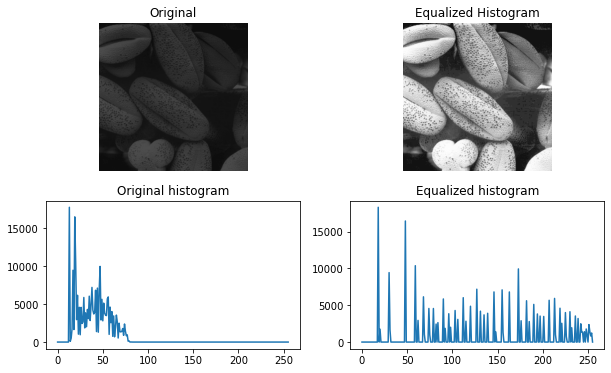

In [130]:
histo_image = cv.imread(r'images/shells.png',cv.IMREAD_GRAYSCALE)
assert histo_image is not None

def histogram_gen(image):       #function to generate histogram of an image
    histo = np.zeros(256)
    for row in image:
        for col in row:
            histo[col]+=1
    return histo

def equalize_histogram(image):      #function to generate equalized histogram table
    hstgrm = histogram_gen(image)
    for i in range(1,len(hstgrm)):
        hstgrm[i] += hstgrm[i-1]
    M = len(image)
    N = len(image[0])
    L = 256
    lookuptable =  list(map(int,(L-1)*hstgrm/(M*N)))

    return lookuptable
    
def equalized_image(image):         #Applying the equalized histogram table
    copy = image.copy()
    lookuptable = equalize_histogram(image)
    M = len(image)
    N = len(image[0])
    for i in range(M):
        for j in range(N):
            copy[i][j] = lookuptable[image[i][j]]
    return copy


# fig,ax = plt.subplots(1,2,figsize=(10,6))
# ax[0].plot(histo)
# ax[1].plot(eql)

output_histo = equalized_image(histo_image) 

original_histogram = histogram_gen(histo_image)
output_histogram = histogram_gen(output_histo)

fig,ax = plt.subplots(2,2,figsize=(10,6))
ax[0][0].imshow(cv.cvtColor(histo_image,cv.COLOR_BGR2RGB))
ax[0][0].axis('off')
ax[0][0].title.set_text('Original')
ax[0][1].imshow(cv.cvtColor(output_histo,cv.COLOR_BGR2RGB))
ax[0][1].axis('off')
ax[0][1].title.set_text('Equalized Histogram')
ax[1][0].plot(original_histogram)
ax[1][0].title.set_text('Original histogram')
ax[1][1].plot(output_histogram)
ax[1][1].title.set_text('Equalized histogram')

plt.savefig(r"../../Assignment 1/4.jpg")

Qusetion Five

In [145]:
nns = cv.imread(r'images/im01small.png')
nnz = cv.imread(r'images/im01.png')
bis = cv.imread(r'images/im02small.png')

def zoom_nn(image,scale):                           #function for near neighbouring zooming.
    rows = int(scale*image.shape[0])
    cols = int(scale*image.shape[1])
    zoomed = np.zeros((rows,cols,image.shape[2]),dtype=image.dtype)
    for i in range(rows):
        r_i = round(i/scale)
        if r_i>=image.shape[0]:r_i =image.shape[0] - 1
        for j in range(cols):
            r_j = round(j/scale)
            if r_j>=image.shape[1]:r_j = image.shape[1]-1
            zoomed[i][j] = image[r_i][r_j]
    return zoomed

def zoom_bi(image,scale):                                   #function for bilateral interpolation
    rows = int(scale*image.shape[0])
    cols = int(scale*image.shape[1])
    zoomed = np.zeros((rows,cols,image.shape[2]),dtype=image.dtype)
    for i in range(rows):
        point_i = i/scale
        i_i = int(point_i)
        r_i = round(point_i)
        if r_i>=image.shape[0]:r_i =image.shape[0] - 1
        for j in range(cols):
            point_j = j/scale
            i_j = int(point_j)
            r_j = round(point_j)
            if r_j>=image.shape[1]:r_j = image.shape[1]-1
            x1 = image[i_i,i_j,:]
            x2 = image[r_i,i_j,:]
            x3 = image[i_i,r_j,:]
            x4 = image[r_i,r_j,:]
            h1,h2,v = 0,0,0
            if (i_i != r_i and i_j!= r_j):
                h1 = x2*(point_i - i_i) + x1*(r_i - point_i)
                h2 = x4*(point_i - i_i) + x3*(r_i - point_i)
                v = h2*(point_j-i_j)+h1*(r_j-point_j)
            elif(i_i != r_i):
                v = x2*(point_i - i_i) + x1*(r_i - point_i)
            elif (i_j!= r_j):
                v = x2*(point_j-i_j)+x4*(r_j-point_j)
            else: v = x1
            zoomed[i,j,:] = v
    return zoomed

for s in range(4,5):
    zoomed_img_nn  = zoom_nn(nns,s)
    zoomed_img_bi = zoom_bi(nns,s)

    if (s == 4):
        x,y,z = nns.shape
        print("SSD - Nearest Neighbour method : ",np.sum((zoomed_img_nn-nnz)**2)/(x*y*z))
        print("SSD - Bilateral Interpolation method : ",np.sum((zoomed_img_bi-nnz)**2)/(x*y*z))

    cv.namedWindow('Original',cv.WINDOW_AUTOSIZE)
    cv.imshow('Original',nns)
    cv.waitKey(0)
    cv.namedWindow('Zoomed_NN',cv.WINDOW_AUTOSIZE)
    cv.imshow('Zoomed_NN',zoomed_img_bi)
    cv.waitKey(0)
    cv.namedWindow('Zoomed_BI',cv.WINDOW_AUTOSIZE)
    cv.imshow('Zoomed_BI',zoomed_img_bi)
    cv.waitKey(0)
    cv.destroyAllWindows()

SSD - Nearest Neighbour method :  641.7878832304526
SSD - Bilateral Interpolation method :  545.5741100823045


Question six

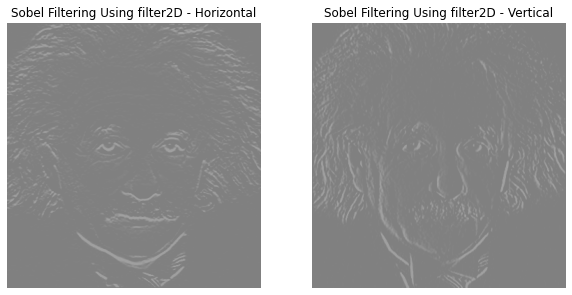

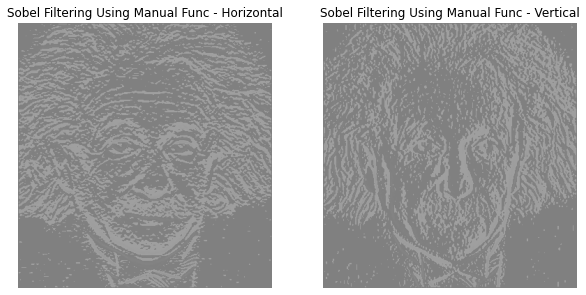

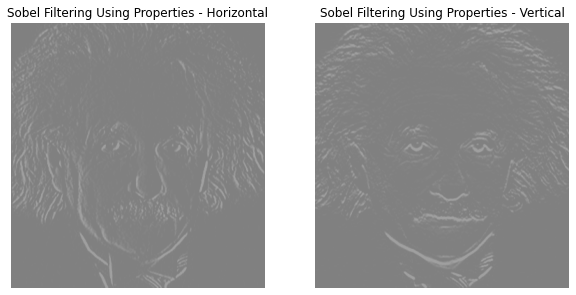

In [147]:
sobel_img = cv.imread(r'images/einstein.png',cv.IMREAD_GRAYSCALE)
assert sobel_img is not None
import math

#6_a

sobel_ver = np.array(((-1,-2,-1),(0,0,0),(1,2,1)))
sobel_hor = np.array(((-1,0,1),(-2,0,2),(-1,0,1)))

imgx = cv.filter2D(sobel_img,-1,sobel_ver)
imgy = cv.filter2D(sobel_img,-1,sobel_hor)

#6_b

def sobel_filter(img,kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1]%2 == 1
    kernel_height,kernel_width = math.floor(kernel.shape[0]/2),math.floor(kernel.shape[1]/2)
    h,w = len(img),len(img[0])
    img_float = cv.normalize(img.astype('float'),None,0.0,1.0,cv.NORM_MINMAX)
    result = np.zeros(img.shape,'float')

    for hei in range(kernel_height,h-kernel_height):
        for wid in range(kernel_width,w-kernel_width):
            result[hei,wid] = np.dot(img_float[hei-kernel_height:hei+kernel_height+1,wid-kernel_width:wid+kernel_width+1].flatten(),kernel.flatten())
    return result

kernel_ver = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype='float')/10
kernel_hor = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype='float')/10

img_m_x = sobel_filter(sobel_img,kernel_ver)
img_m_x = img_m_x*255.0
img_m_x = img_m_x.astype(np.uint8)

img_m_y = sobel_filter(sobel_img,kernel_hor)
img_m_y = img_m_y*255.0
img_m_y = img_m_y.astype(np.uint8)

#6_c

kernel1 = np.array(((-1,), (0,), (1,)))
kernel2 = np.array((1,2,1))

img_c_y = cv.filter2D(sobel_img,-1,kernel1)
img_c_y = cv.filter2D(img_c_y,-1,kernel2)

img_c_x = cv.filter2D(sobel_img,-1,kernel1.T)
img_c_x = cv.filter2D(img_c_x,-1,kernel2.T)


fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(imgx,cmap = 'gray', vmin=-1020, vmax=1020)
ax[0].title.set_text('Sobel Filtering Using filter2D - Horizontal')
ax[0].axis('off')

ax[1].imshow(imgy,cmap = 'gray', vmin=-1020, vmax=1020)
ax[1].title.set_text('Sobel Filtering Using filter2D - Vertical')
ax[1].axis('off')

plt.savefig(r"../../Assignment 1/61.jpg")

fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(img_m_x,cmap = 'gray', vmin=-1020, vmax=1020)
ax[0].title.set_text('Sobel Filtering Using Manual Func - Horizontal')
ax[0].axis('off')

ax[1].imshow(img_m_y,cmap = 'gray', vmin=-1020, vmax=1020)
ax[1].title.set_text('Sobel Filtering Using Manual Func - Vertical')
ax[1].axis('off')

plt.savefig(r"../../Assignment 1/62.jpg")

fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(img_c_x,cmap = 'gray', vmin=-1020, vmax=1020)
ax[0].title.set_text('Sobel Filtering Using Properties - Horizontal')
ax[0].axis('off')

ax[1].imshow(img_c_y,cmap = 'gray', vmin=-1020, vmax=1020)
ax[1].title.set_text('Sobel Filtering Using Properties - Vertical')
ax[1].axis('off')

plt.savefig(r"../../Assignment 1/63.jpg")

Question Seven

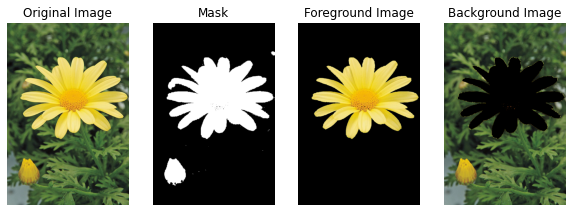

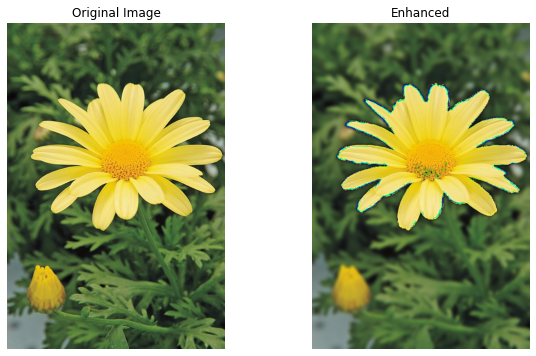

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

grab_img = cv.imread(r'images/daisy.jpg')
hsv = cv.cvtColor(grab_img,cv.COLOR_BGR2HSV)                        #changing into HSV
flwer = cv.inRange(hsv,(13,30,30),(30,255,255))                     #filtering the yellow color range
ret, thresh = cv.threshold(flwer, 150, 255, cv.THRESH_BINARY)       #creating the threshold

mask = np.zeros(grab_img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

mask[thresh != 0] = cv.GC_PR_FGD
mask[thresh == 0] = cv.GC_BGD

mask, bgdModel, fgdModel = cv.grabCut(grab_img,mask,None,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK)  #filtering out the flower with the bud
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = grab_img*mask2[:,:,np.newaxis]

mask = np.zeros(grab_img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,100,550,530)

mask, bgdModel, fgdModel = cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)       #removing the bud from the flower
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img2 = img*mask2[:,:,np.newaxis]


fig,ax = plt.subplots(1,4,figsize=(10,6))
ax[0].imshow(cv.cvtColor(grab_img,cv.COLOR_BGR2RGB))
ax[0].title.set_text('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(thresh,cv.COLOR_BGR2RGB))
ax[1].title.set_text('Mask')
ax[1].axis('off')

ax[2].imshow(cv.cvtColor(img2,cv.COLOR_BGR2RGB))
ax[2].title.set_text('Foreground Image')
ax[2].axis('off')

ax[3].imshow(cv.cvtColor(grab_img - img2,cv.COLOR_BGR2RGB))
ax[3].title.set_text('Background Image')
ax[3].axis('off')

plt.savefig(r"../../Assignment 1/71.jpg")

blurred_background = cv.GaussianBlur(grab_img-img2,(15,15),4)
enhanced_foreground = cv.detailEnhance(img2, 10, 0.15)

fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(cv.cvtColor(grab_img,cv.COLOR_BGR2RGB))
ax[0].title.set_text('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(enhanced_foreground+blurred_background,cv.COLOR_BGR2RGB))
ax[1].title.set_text('Enhanced')
ax[1].axis('off')

plt.savefig(r"../../Assignment 1/72.jpg")
